In [1179]:
cd /Users/xl/Downloads/借啊/评分卡/1023

/Users/xl/Downloads/借啊/评分卡/1023


In [1180]:
from pymongo import MongoClient
import pymongo
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
import numpy as np

In [1181]:
#建立MongoDB数据库连接
client = MongoClient('dds-k1a855c22baf8ec41111-pub.mongodb.ap-southeast-5.rds.aliyuncs.com', 3717)
db_auth = client.admin
#账号和密码
db_auth.authenticate('readonly','9skLyjBrvnqmCltkeqrazfqfoxc20')
# 链接数据库
db = client.uangtech_loan

In [ ]:
#连接mysql
import pymysql.cursors
# 打开数据库连接
dbsql=pymysql.connect(host="rr-k1as63vd06u3f2b61qo.mysql.ap-southeast-5.rds.aliyuncs.com", 
user="cashday_pro_read",password="Cashday_pro_read",database="uangtech_loan",port=3306, charset='utf8' )
# 使用cursor()方法获取操作游标
cur = dbsql.cursor()

In [ ]:
# SQL 查询语句
sql="select loan_money_date, audit_order_no, over_due_days ,status from \
     t_loan_audit_order where loan_money_date >'2018-11-05'"
# 执行SQL语句
cur.execute(sql)
# 获取所有记录列表
results = cur.fetchall()

df_audit = pd.DataFrame(list(results),columns= ['loan_money_date', 'audit_order_no','over_due_days','status'])

sql_risk = "select uid,loan_order_no, risk_order_no \
            from t_risk_order  where create_time >'2018-11-05' "

cur.execute(sql_risk)
res_risk = cur.fetchall()

df_risk = pd.DataFrame(list(res_risk), columns = ['uid','loan_order_no', 'risk_order_no'])

In [ ]:
df_loan_due = pd.merge(df_risk, df_audit, left_on ='loan_order_no',  right_on = 'audit_order_no',how = 'inner')

In [ ]:
df_loan_due.head(2)

# 引擎变量获取

In [4]:
df_yq = pd.DataFrame(list(db.t_sl_request.find({'createTime':{
                                                          "$gte": datetime(2018,11,6)
                                                          #,"$lte":datetime(2018,11,5)
                                                                 }},
                                                   {'_id':0,"riskOrderNo":1,"finalCheckOutput.score":1,"createTime":1,
'basicInfo.idNumber':1,'basicInfo.age':1,'basicInfo.city':1,'basicInfo.education':1,'basicInfo.marriageStatus':1,
'basicInfo.homeAddress':1,'basicInfo.sex':1,'basicInfo.phoneNumber':1,'clientTypeCheck.clientType':1,
'clientTypeCheck.sourceMark':1,'clientTypeCheck.applyTimes':1,'clientTypeCheck.applyTimesE':1,
'clientTypeCheck.applyTimesEBackIn30D':1,'clientTypeCheck.applyTimesEBackIn60D':1,
'clientTypeCheck.applyTimesEBackIn90D':1,'clientTypeCheck.applyTimesEBackIn180D':1,'clientTypeCheck.loanTimes':1,
'clientTypeCheck.loanTimesBackIn30D':1,'clientTypeCheck.loanTimesBackIn60D':1,'clientTypeCheck.loanTimesBackIn90D':1,
'clientTypeCheck.loanTimesBackIn180D':1,'clientTypeCheck.overdueDays':1,'video.videoLength':1,'workInfo.companyName':1,
'workInfo.industry':1,'workInfo.companyAddress':1,'deviceInfo.cellphoneIP':1,'deviceInfo.totalAPP':1,
'deviceInfo.loanAPP':1,'deviceInfo.shoppingAPP':1,'deviceInfo.totalContactTel':1,'deviceInfo.totalAPPContactTel':1,
'deviceInfo.device':1,'deviceInfo.ipSumBackIn14D':1,'deviceInfo.ipSumBackIn30D':1,
'deviceInfo.ipSumBackIn90D':1,'deviceInfo.ipSumBackIn180D':1,'callRecord.totalCall.totalCallBackIn7D':1,
'callRecord.totalCall.totalCallBackIn14D':1,'callRecord.totalCall.totalCallBackIn30D':1,'callRecord.totalCall.totalCallBackIn60D':1,
'callRecord.totalCall.totalCallBackIn90D':1,'callRecord.callOut.callOutBackIn7D':1,'callRecord.callOut.callOutBackIn14D':1,
'callRecord.callOut.callOutBackIn30D':1,
'callRecord.callOut.callOutBackIn60D':1,'callRecord.callOut.callOutBackIn90D':1,'callRecord.callIn.callInBackIn7D':1,
'callRecord.callIn.callInBackIn14D':1,'callRecord.callIn.callInBackIn30D':1,'callRecord.callIn.callInBackIn60D':1,
'callRecord.callIn.callInBackIn90D':1,'callRecord.callNo.callNoBackIn7D':1,'callRecord.callNo.callNoBackIn14D':1,
'callRecord.callNo.callNoBackIn30D':1,'callRecord.callNo.callNoBackIn60D':1,'callRecord.callNo.callNoBackIn90D':1,
'callRecord.callAPPContact.callAPPContactBackIn7D':1,
'callRecord.callAPPContact.callAPPContactBackIn14D':1,
'callRecord.callAPPContact.callAPPContactBackIn30D':1,
'callRecord.callAPPContact.callAPPContactBackIn60D':1,
'callRecord.callAPPContact.callAPPContactBackIn90D':1,
'callRecord.callAPPContact.timeIntervalFirstAPPContactBackIn7D':1,
'callRecord.callAPPContact.timeIntervalFirstAPPContactBackIn14D':1,
'callRecord.callAPPContact.timeIntervalFirstAPPContactBackIn30D':1,
'callRecord.callAPPContact.timeIntervalFirstAPPContactBackIn60D':1,
'callRecord.callAPPContact.timeIntervalFirstAPPContactBackIn90D':1,
'callRecord.callContact.callContactBackIn7D':1,
'callRecord.callContact.callContactBackIn14D':1,
'callRecord.callContact.callContactBackIn30D':1,
'callRecord.callContact.callContactBackIn60D':1,
'callRecord.callContact.callContactBackIn90D':1,
'sms.totalSMS.totalSMSBackIn7D':1,
'sms.totalSMS.totalSMSBackIn14D':1,'sms.totalSMS.totalSMSBackIn30D':1,
'sms.totalSMS.totalSMSBackIn30PlusD':1,
'sms.totalSMS.totalSMSTelBackIn7D':1,'sms.totalSMS.totalSMSTelBackIn14D':1,
'sms.totalSMS.totalSMSTelBackIn30D':1,'sms.totalSMS.totalSMSTelBackIn30PlusD':1,
'sms.contact.contactSMSBackIn7D':1,'sms.contact.contactSMSBackIn14D':1,
'sms.contact.contactSMSBackIn30D':1,'sms.contact.contactSMSBackIn30PlusD':1,
'sms.APPContact.APPContactRecordSMSBackIn7D':1,'sms.APPContact.APPContactRecordSMSBackIn14D':1,
'sms.APPContact.APPContactRecordSMSBackIn30D':1,'sms.APPContact.APPContactRecordSMSBackIn30PlusD':1,
'sms.callRecordSMS.callRecordSMSBackIn7D':1,
'sms.callRecordSMS.callRecordSMSBackIn14D':1,'sms.callRecordSMS.callRecordSMSBackIn30D':1,
'sms.callRecordSMS.callRecordSMSBackIn30PlusD':1,'deviceInfoRiskCheck.sMSCheck.totalRefusal':1,
'deviceInfoRiskCheck.sMSCheck.totalPass':1,
'deviceInfoRiskCheck.sMSCheck.totalSMSCheck':1,'callRecordCheck.callRecordsIn15D':1,
'callRecordCheck.callPersonsIn15D':1,'callRecordCheck.callRecordsIn7D':1,
'callRecordCheck.callPersonsIn7D':1,'aPPCheck.gapTime':1,
'behaviorAntiFraudCheck.registerTime':1,'behaviorAntiFraudCheck.registerTimeC':1,
'behaviorAntiFraudCheck.applyTime':1,'behaviorAntiFraudCheck.applyTimeC':1,
'behaviorAntiFraudCheck.lackOfSign':1,'deviceAntiFraudCheck.iMEICount':1,
'deviceAntiFraudCheck.registerCountSameTimeIP':1,
'deviceAntiFraudCheck.registerCountSameTimeDevice':1,
'deviceAntiFraudCheck.registerCountSameTimeMAC':1,
'whitelistMatch.whitelistMark':1,
'admittanceStrategyCheck.internalBlacklistMatchResult':1,
'admittanceStrategyCheck.contactMatchInternalBlacklistResult':1,
'admittanceStrategyCheck.admittanceCheckResult':1,
'admittanceStrategyCheck.admittanceCheckRefuseReason':1,
'admittanceStrategyCheck.admittanceCheckMark':1,
'internalMatch.companyTelMatchCount':1,
'internalMatch.companyNameMatchCount':1,
'internalMatch.companyTelMatchCompanyNameInconsistencyCount':1,
'internalMatch.companyTelMatchOverdueCount':1,
'internalMatch.borrowerTelMatchContactlistCountIn7D':1,
'internalMatch.companyTelMatchCountIn30Min':1,
'internalMatch.borrowerTelMatchContactlistOverdueCount':1,
'contactsInfo.contactTelRanking':1,'finalCheckOutput.score':1,
'productTypeCheck.productType':1,'antiFraudCheck.antiFraudMark':1,
'multiPlatformCheck.multiPlatform7D':1,'multiPlatformCheck.multiPlatform14D':1,
'multiPlatformCheck.multiPlatform21D':1,'multiPlatformCheck.multiPlatform30D':1,
'multiPlatformCheck.multiPlatform60D':1,'multiPlatformCheck.multiPlatform90D':1,
'multiPlatformCheck.multiPlatformAbove90D':1,'timeInterval.apply.firstApplyBetweenRecentBackIn30D':1,
'timeInterval.apply.firstApplyBetweenRecentBackIn60D':1,
'timeInterval.apply.firstApplyBetweenRecentBackIn90D':1,
'timeInterval.apply.firstApplyBetweenRecentBackIn180D':1,'timeInterval.apply.lastApplyBetweenRecentBackIn30D':1,
'timeInterval.apply.lastApplyBetweenRecentBackIn60D':1,'timeInterval.apply.lastApplyBetweenRecentBackIn90D':1,
'timeInterval.apply.lastApplyBetweenRecentBackIn180D':1,'timeInterval.apply.averageApplyTimeIntervalBackIn30D':1,
'timeInterval.apply.averageApplyTimeIntervalBackIn60D':1,'timeInterval.apply.averageApplyTimeIntervalBackIn90D':1,
'timeInterval.apply.averageApplyTimeIntervalBackIn180D':1,
'loan.firstLoanBetweenRecentBackIn30D':1,'loan.firstLoanBetweenRecentBackIn60D':1,
'loan.firstLoanBetweenRecentBackIn90D':1,'loan.firstLoanBetweenRecentBackIn180D':1,'loan.lastLoanBetweenRecentBackIn30D':1,
'loan.lastLoanBetweenRecentBackIn60D':1,'loan.lastLoanBetweenRecentBackIn90D':1,
'loan.lastLoanBetweenRecentBackIn180D':1,'loan.averageLoanTimeIntervalBackIn30D':1,
'loan.averageLoanTimeIntervalBackIn60D':1,
'loan.averageLoanTimeIntervalBackIn90D':1,'loan.averageLoanTimeIntervalBackIn180D':1
                                                   }
                                                  ,no_cursor_timeout = True)))

In [5]:
df_yq.columns

Index(['admittanceStrategyCheck', 'antiFraudCheck', 'basicInfo',
       'behaviorAntiFraudCheck', 'callRecord', 'clientTypeCheck',
       'contactsInfo', 'createTime', 'deviceAntiFraudCheck', 'deviceInfo',
       'deviceInfoRiskCheck', 'finalCheckOutput', 'internalMatch',
       'multiPlatformCheck', 'productTypeCheck', 'riskOrderNo', 'sms',
       'timeInterval', 'video', 'whitelistMatch', 'workInfo'],
      dtype='object')

In [393]:
list(df_yq['sms'])[0]

{'APPContact': {'APPContactRecordSMSBackIn14D': 0,
  'APPContactRecordSMSBackIn30D': 0,
  'APPContactRecordSMSBackIn30PlusD': 0,
  'APPContactRecordSMSBackIn7D': 0},
 'callRecordSMS': {'callRecordSMSBackIn14D': 0,
  'callRecordSMSBackIn30D': 0,
  'callRecordSMSBackIn30PlusD': 0,
  'callRecordSMSBackIn7D': 0},
 'contact': {'contactSMSBackIn14D': 0,
  'contactSMSBackIn30D': 3,
  'contactSMSBackIn30PlusD': 0,
  'contactSMSBackIn7D': 0},
 'totalSMS': {'totalSMSBackIn14D': 11,
  'totalSMSBackIn30D': 15,
  'totalSMSBackIn30PlusD': 0,
  'totalSMSBackIn7D': 5,
  'totalSMSTelBackIn14D': 4,
  'totalSMSTelBackIn30D': 6,
  'totalSMSTelBackIn30PlusD': 0,
  'totalSMSTelBackIn7D': 3}}

# 引擎数据整理

In [385]:
def sp_se(serise):
    def proce_data(info):
    #info = json.loads(data.replace("'", '"'))
        tem_dict = {}
        for k in info:
            tem_dict.update(info[k])
        return tem_dict
    a = serise.map(lambda x:proce_data(x)).tolist()
    return pd.DataFrame(a)

def sres_sp(serise):
    df = pd.DataFrame(columns = serise[0].keys(),index = range(len(serise)))
    for i in range(len(serise)):
        df.loc[i] = list(serise[i].values())
    return df

def contac_info(serise):
    df = pd.DataFrame(columns= ['con_1','con_2','con_3','con_4'],index = range(len(serise)))
    for i in range(len(serise)):
        df.loc[i] = list(pd.DataFrame(serise[i]).T.loc['contactTelRanking'])
    return df
# df_yq['riskOrderNo'][36565] 'FEK2018111511050836431407'

def admittanceStrategyCheck(serise):
    df = pd.DataFrame(columns= ['internalBlacklistMatchResult','contactMatchInternalBlacklistResult', 
                                'admittanceCheckResult','admittanceCheckRefuseReason'],index = range(len(serise)))
    for i in range(len(serise)):
        df.loc[i] = [list(serise[i].values())[0],list(serise[i].values())[1],
                     list(serise[i].values())[2],list(serise[i].values())[3]]

    return df

In [387]:
# 用contac_info()：'contac_info','contactsInfo' # df_yq['riskOrderNo'][36565] 'FEK2018111511050836431407'

# 直接用： 'createTime','riskOrderNo',

# 不用：  'finalCheckOutput'

# 用sres_sp()： 'video', 'basicInfo',’behaviorAntiFraudCheck‘,'internalMatch','multiPlatformCheck','workInfo',
                #'deviceInfo','productTypeCheck','deviceAntiFraudCheck'

# 用sq_se():  'timeInterval', 'callRecord', 'sms','antiFraudCheck','clientTypeCheck','deviceInfoRiskCheck','whitelistMatch'

# 评分卡通过率数据监控

In [1161]:
df_score = pd.DataFrame(list(db.t_sl_request.find({'createTime':{
                                                          "$gte": datetime(2018,11,6)
                                                          #,"$lte":datetime(2018,11,5)
                                                                 }},
                                                   {'_id':0,"riskOrderNo":1,"finalCheckOutput.score":1,
                                                    "createTime":1,'clientTypeCheck.ruleMark':1,'finalCheckOutput.finalCheckMark':1}
                                                  ,no_cursor_timeout = True)))
df_score.head()

,clientTypeCheck,createTime,finalCheckOutput,riskOrderNo
0,{'ruleMark': 'S3'},2018-11-06 00:01:11.989,"{'finalCheckMark': ['S3'], 'score': '0.0'}",FEK2018110607011050728626
1,{'ruleMark': 'S3'},2018-11-06 00:03:05.712,"{'finalCheckMark': ['S3'], 'score': '0.0'}",FEK2018110607030345250820
2,{'ruleMark': 'S1'},2018-11-06 00:05:06.254,"{'finalCheckMark': ['S1', 'K8', 'N1', 'N7'], '...",FEK2018110607050019892312
3,{'ruleMark': 'S3'},2018-11-06 00:07:56.581,"{'finalCheckMark': ['S3'], 'score': '0.0'}",FEK2018110607075524346732
4,{'ruleMark': 'S1'},2018-11-06 00:08:37.913,"{'finalCheckMark': ['S1', 'M6-2', 'K2'], 'scor...",FEK2018110607083650440607


In [1162]:
df_score['score'] = df_score['finalCheckOutput'].map(lambda s: list(s.values())[1])
df_score['clientTypeCheck'] = df_score['finalCheckOutput'].map(lambda s: list(s.values())[0])
#df_score['idNumber'] = df_score['basicInfo'].map(lambda s: list(s.values())[0])

df_scorecard = df_score.drop('finalCheckOutput',1)
df_scorecard['score']  = df_scorecard['score'].astype(float)

#df_scorecard.sort_values(by = 'score', ascending=False)

# 取过模型的数据且排序
df = df_scorecard[df_scorecard['score']>0].sort_values(by = 'createTime',ascending = False)

In [1116]:
df['yq_time'] = df['createTime'].dt.date

In [1139]:
df.shape

(3129, 5)

In [1133]:
df_06 = df[(df['yq_time'].map(str)=='2018-11-06')&(df['createTime'].dt.hour>8)]

df_06[df_06['score']>418].shape[0]/df_06[df_06['score']>0].shape[0]

0.4563106796116505

In [1134]:
df_07 = df[(df['yq_time'].map(str)=='2018-11-07')]

df_07[df_07['score']>418].shape[0]/df_07[df_07['score']>0].shape[0]

0.4

In [1135]:
df_08 = df[(df['yq_time'].map(str)=='2018-11-08')]

df_08[df_08['score']>418].shape[0]/df_08[df_08['score']>0].shape[0]

0.3222591362126246

In [1141]:
df_09 = df[(df['yq_time'].map(str)=='2018-11-09')]

df_09[df_09['score']>418].shape[0]/df_09[df_09['score']>0].shape[0]

0.358974358974359

In [1140]:
df[df['score']>418].shape[0]/df[df['score']>0].shape[0]

0.36337488015340363

In [570]:
df.head()

,createTime,riskOrderNo,score
52730,2018-11-22 04:08:18.066,FEK2018112211081346019238,425.0
52721,2018-11-22 04:05:42.529,FEK2018112211053862656331,345.0
52715,2018-11-22 04:04:26.808,FEK2018112211041982665089,442.0
52708,2018-11-22 04:01:24.140,FEK2018112211012068188948,484.0
52700,2018-11-22 03:57:30.416,FEK2018112210572619798882,520.0


In [341]:
df[df['createTime']>'2018-11-06 8:00:00']

,createTime,riskOrderNo,score
49449,2018-11-21 01:51:55.871,FEK2018112108515255510013,424.0
49415,2018-11-21 01:43:20.698,FEK2018112108431731309944,350.0
49408,2018-11-21 01:41:20.939,FEK2018112108411842999498,345.0
49399,2018-11-21 01:39:15.445,FEK2018112108391267698596,429.0
49382,2018-11-21 01:35:02.049,FEK2018112108345985099129,324.0
49333,2018-11-21 01:18:24.698,FEK2018112108182209967452,444.0
49317,2018-11-21 01:10:40.641,FEK2018112108103808489355,327.0
49301,2018-11-21 01:05:57.152,FEK2018112108055435538970,454.0
49299,2018-11-21 01:04:45.272,FEK2018112108044315974442,365.0
49298,2018-11-21 01:04:20.754,FEK2018112108041860836588,412.0


In [391]:
df[(df['createTime'].dt.day ==6)&(df['score']>418)&(df['createTime'].dt.hour > 7)&
   (df['createTime'].dt.hour <16)]

,createTime,riskOrderNo,score
2714,2018-11-06 15:21:37.120,FEK2018110622213420660445,456.0
2672,2018-11-06 14:54:40.959,FEK2018110621543958975347,421.0
2664,2018-11-06 14:49:13.619,FEK2018110621491165697086,451.0
2645,2018-11-06 14:39:52.104,FEK2018110621394915875259,440.0
2632,2018-11-06 14:32:59.977,FEK2018110621325816859764,420.0
2615,2018-11-06 14:25:19.044,FEK2018110621251688552668,500.0
2569,2018-11-06 14:03:46.222,FEK2018110621034311220504,553.0
2472,2018-11-06 13:33:58.830,FEK2018110620335668599896,425.0
2443,2018-11-06 13:23:41.555,FEK2018110620233969328284,447.0
2347,2018-11-06 12:52:34.135,FEK2018110619523226191732,485.0


In [474]:
df['date'] = df['createTime'].dt.date

df['hour'] = df['createTime'].dt.hour

df.head()

,createTime,riskOrderNo,score,date,hour
51412,2018-11-21 10:45:06.402,FEK2018112117450390428271,394.0,2018-11-21,10
51374,2018-11-21 10:28:29.683,FEK2018112117282770424258,392.0,2018-11-21,10
51371,2018-11-21 10:27:00.630,FEK2018112117265853163368,440.0,2018-11-21,10
51367,2018-11-21 10:22:42.128,FEK2018112117223946679199,302.0,2018-11-21,10
51353,2018-11-21 10:20:12.404,FEK2018112117200902334949,392.0,2018-11-21,10


#  hour 分布

<Container object of 24 artists>

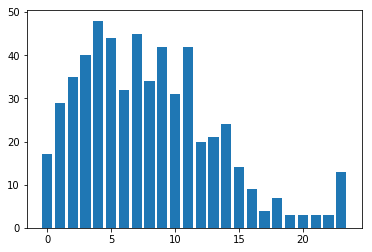

In [475]:
df_452 = df[df['score']>451].sort_values(by = 'createTime',ascending = False)
df_452_plot = df_452.groupby('hour').count().reset_index()
plt.bar(df_452_plot['hour'],df_452_plot['createTime'])

<Container object of 24 artists>

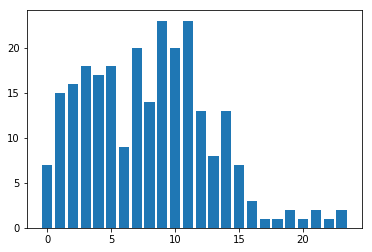

In [109]:
df_452 = df[df['score']>451].sort_values(by = 'createTime',ascending = False)
df_452_plot = df_452.groupby('hour').count().reset_index()
plt.bar(df_452_plot['hour'],df_452_plot['createTime'])

<Container object of 23 artists>

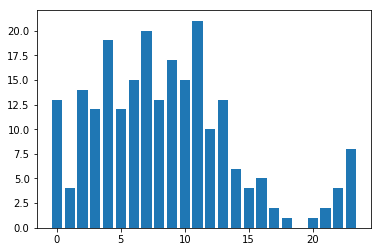

In [113]:
df_419 = df[(df['score']<452) &(df['score']>418)].sort_values(by = 'createTime',ascending = False)
df_419_plot = df_419.groupby('hour').count().reset_index()
plt.bar(df_419_plot['hour'],df_419_plot['createTime'])

<Container object of 24 artists>

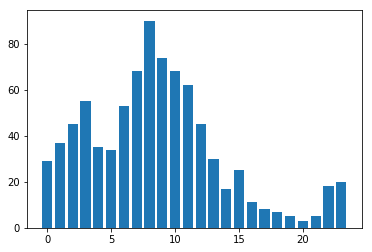

In [116]:
df_400 = df[df['score']<419].sort_values(by = 'createTime',ascending = False)
df_400_plot = df_400.groupby('hour').count().reset_index()
plt.bar(df_400_plot['hour'],df_400_plot['createTime'])

# 分数分布

In [1150]:
df['bin'] = pd.cut(df['score'],[200,300,350,400,450,500,550,600] ).map(str).sort_values()

In [1151]:
df_w1 = df[df['yq_time'].map(str).isin(['2018-11-06','2018-11-07','2018-11-08','2018-11-09','2018-11-10','2018-11-11'])]

Text(0.5,1,'2018-11-06~11')

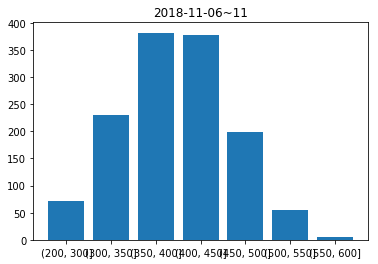

In [1155]:
S_w1 = df_w1.groupby('bin').count().reset_index()
plt.bar(S_w1['bin'],S_w1['createTime'])
plt.title('2018-11-06~11')

Text(0.5,1,'2018-11-12~18')

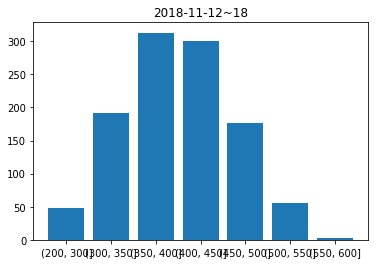

In [1157]:
df_w2 = df[df['yq_time'].map(str).isin(['2018-11-12','2018-11-13','2018-11-14','2018-11-15','2018-11-16',
                                        '2018-11-17','2018-11-18'])]
S_w2 = df_w2.groupby('bin').count().reset_index()
plt.bar(S_w2['bin'],S_w2['createTime'])
plt.title('2018-11-12~18')

<Container object of 6 artists>

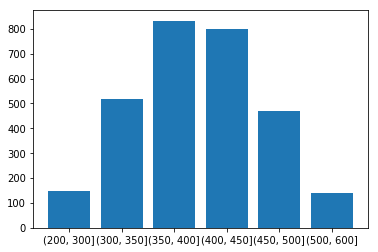

In [928]:
S_plot = df.groupby('bin').count().reset_index()
plt.bar(S_plot['bin'],S_plot['createTime'])

<Container object of 24 artists>

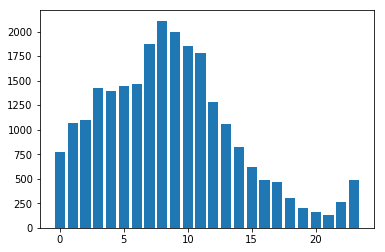

In [76]:
plt.bar(df_s0_plot['hour'],df_s0_plot['createTime'])

In [57]:
df_s0 = df_scorecard[df_scorecard['score']==0].sort_values(by = 'createTime',ascending = False)
df_s0['hour'] = df_s0['createTime'].dt.hour

df_s0_plot = df_s0.groupby('hour').count().reset_index()
df_s0_plot

In [167]:
df_scorecard[df_scorecard['score']>418].shape[0]/df_scorecard[df_scorecard['score']>0].shape[0]

0.36804308797127466

In [14]:
df_scorecard[df_scorecard['score']>418].shape[0]/df_scorecard[df_scorecard['score']>0].shape[0]

0.3649360421369451

In [8]:
df = df_scorecard[df_scorecard['createTime'].dt.hour>7]

In [30]:
df[df['score']>0].shape[0]

1934

In [29]:
df[df['score']>418].shape[0]

709

In [66]:
df[df['score']>418].shape[0]/df[df['score']>0].shape[0]

0.3649360421369451

In [27]:
df[df['score']>451].shape[0]/df[df['score']>0].shape[0]

0.1980351602895553

In [161]:
df[df['score']>451].shape[0]/df[df['score']>0].shape[0]

0.19123252858958067

In [28]:
df[df['score']>451].shape[0]

383

In [83]:
254/1329

0.1911211437170805

In [84]:
((485-254)*0.4+254)/1329

0.2606471030850263

# 标签后的分数分布

In [596]:
df_type_sc_dis = df.copy()

In [597]:
df_type_sc_dis['bin'] = pd.cut(df_type_sc_dis['score'],[200,300,350,400,450,500,600] ).map(str).sort_values()

In [617]:
df_type_sc_dis_S3 = df_type_sc_dis[df_type_sc_dis['clientTypeCheck']=='S3']

Text(0.5,1,'S3 Score')

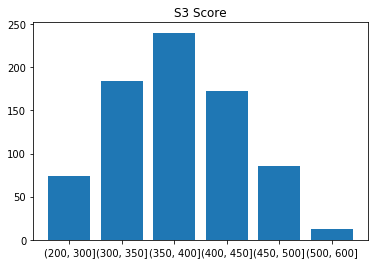

In [626]:
S3_plot = df_type_sc_dis_S3.groupby('bin').count().reset_index()
plt.bar(S3_plot['bin'],S3_plot['score'],)
plt.title('S3 Score')

Text(0.5,1,'S1 Score')

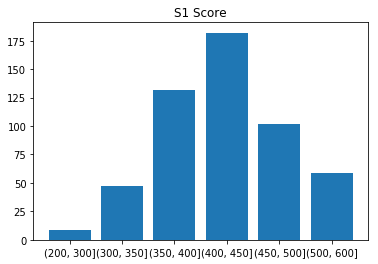

In [627]:
df_type_sc_dis_S1 = df_type_sc_dis[df_type_sc_dis['clientTypeCheck']=='S1']
S1_plot = df_type_sc_dis_S1.groupby('bin').count().reset_index()
plt.bar(S1_plot['bin'],S1_plot['createTime'])
plt.title('S1 Score')

# 评分卡逾期率监控

In [977]:
df_loan_due.head(2)

,uid,loan_order_no,risk_order_no,loan_money_date,audit_order_no,over_due_days,status
0,1050022321592406018,JKD2018110517770454,FEK2018110500093717776966,2018-11-05 16:52:01,JKD2018110517770454,4,6
1,1034356915716403201,JKD2018110519944376,FEK2018110500260219943801,2018-11-05 09:28:01,JKD2018110519944376,0,4


In [981]:
df.shape

(3129, 4)

In [ ]:
df_due = pd.merge(df, df_loan_due, how = 'left',
                  left_on = 'riskOrderNo', right_on = 'risk_order_no')

In [1164]:
df_due.shape

(3328, 11)

In [ ]:
df_check = df_due[(df_due['createTime']>'2018-11-6 08:00:00')&(df_due['status'].isin([4,6]))]

df_check['YN_date'] = df_check['loan_money_date'].dt.date

In [1085]:
df_check.head()

,clientTypeCheck,createTime,riskOrderNo,score,uid,loan_order_no,risk_order_no,loan_money_date,audit_order_no,over_due_days,status
895,"[S3, N1, N7]",2018-11-17 03:33:45.273,FEK2018111710334261020008,461.0,1.063634e+18,JKD2018111761026492,FEK2018111710334261020008,2018-11-17 11:30:08,JKD2018111761026492,0.0,4.0
1238,"[S1, K6-1, K6-2]",2018-11-15 00:13:26.132,FEK2018111507132284228232,469.0,1.043299e+18,JKD2018111584228801,FEK2018111507132284228232,2018-11-15 11:02:01,JKD2018111584228801,0.0,4.0
1244,"[S3, K6-1, K6-2, M5]",2018-11-14 23:49:31.251,FEK2018111506492819883508,482.0,1.061532e+18,JKD2018111519884443,FEK2018111506492819883508,2018-11-15 10:49:01,JKD2018111519884443,0.0,4.0
1253,"[S11, N4]",2018-11-14 18:57:55.840,FEK2018111501575383615668,483.0,1.058412e+18,JKD2018111583612860,FEK2018111501575383615668,2018-11-15 11:23:01,JKD2018111583612860,1.0,6.0
1326,"[S11, N4]",2018-11-14 08:42:45.963,FEK2018111415424376825702,427.0,1.053214e+18,JKD2018111476826865,FEK2018111415424376825702,2018-11-14 16:02:01,JKD2018111476826865,0.0,4.0


In [1175]:
#9号全部
d_ck = df_check[df_check['YN_date'].map(str) ==
         '2018-11-09'][['riskOrderNo','status','over_due_days']]

d_ck1 = d_ck.groupby(['status','over_due_days']).count().reset_index()
d_ck1

,status,over_due_days,riskOrderNo
0,4.0,0.0,31
1,6.0,1.0,22


In [1176]:
#9号452分
d_ck_452 = df_check[(df_check['YN_date'].map(str) == '2018-11-09') & (df_check['score']>451)]\
                    [['riskOrderNo','status','over_due_days']]

d_ck_452_1 = d_ck_452.groupby(['status','over_due_days']).count().reset_index()
d_ck_452_1

,status,over_due_days,riskOrderNo
0,4.0,0.0,24
1,6.0,1.0,13


In [1168]:
#11月7日全部
d_ck = df_check[df_check['YN_date'].map(str) ==
         '2018-11-07'][['riskOrderNo','status','over_due_days']]

d_ck1 = d_ck.groupby(['status','over_due_days']).count().reset_index()
d_ck1

,status,over_due_days,riskOrderNo
0,4.0,0.0,27
1,4.0,1.0,5
2,4.0,2.0,3
3,6.0,3.0,17


In [1169]:
d_ck_452 = df_check[(df_check['YN_date'].map(str) == '2018-11-07') & (df_check['score']>451)]\
                    [['riskOrderNo','status','over_due_days']]

d_ck_452_1 = d_ck_452.groupby(['status','over_due_days']).count().reset_index()
d_ck_452_1

,status,over_due_days,riskOrderNo
0,4.0,0.0,14
1,4.0,1.0,4
2,4.0,2.0,3
3,6.0,3.0,12


In [ ]:
# 8号全部
d_ck = df_check[df_check['YN_date'].map(str) ==
         '2018-11-08'][['riskOrderNo','status','over_due_days']]

d_ck1 = d_ck.groupby(['status','over_due_days']).count().reset_index()
d_ck1

In [ ]:
d_ck_452 = df_check[(df_check['YN_date'].map(str) == '2018-11-08') & (df_check['score']>451)]\
                    [['riskOrderNo','status','over_due_days']]

d_ck_452_1 = d_ck_452.groupby(['status','over_due_days']).count().reset_index()
d_ck_452_1

# 拒绝原因

In [915]:
sql_rejeck = "select risk_order_no,loan_order_no,remark,code from t_risk_order \
where status=4 and remark is not null and create_time between '2018-11-07 ' and '2018-11-09'"

In [916]:
# 执行SQL语句
cur.execute(sql_rejeck)
# 获取所有记录列表
results = cur.fetchall()

df_rej = pd.DataFrame(list(results),columns= ['risk_order_no', 'loan_order_no','remark','code'])

In [902]:
df_xs = df[(df['score']>418)]
df_xs.head(3)

,clientTypeCheck,createTime,riskOrderNo,score,bin
53240,S11,2018-11-22 06:30:08.858,FEK2018112213300653304003,482.0,"(450, 500]"
53216,,2018-11-22 06:27:08.547,FEK2018112213270582252431,437.0,"(400, 450]"
53119,S1,2018-11-22 06:08:44.126,FEK2018112213084143653028,424.0,"(400, 450]"


In [903]:
df_xs.shape

(1071, 5)

In [918]:
df_cl = pd.merge(df_rej, df_xs, left_on = 'risk_order_no', right_on = 'riskOrderNo', how = 'left')

df_cl = df_cl[df_cl['score']>0]

df_cl = df_cl.drop(['bin','riskOrderNo'],1)

In [921]:
df_cl['remark'].value_counts()

视频不符要求                  18
身份证不符要求                 15
K1标识的职业信审核实不符            8
如在电核询问中前后信息不符、交叉验证不符     6
还款能力不足                   4
联系人电话异常                  4
申请人沟通异常                  4
联系人虚假                    3
亲属核实异常                   2
公司电话异常                   1
单位电话虚假                   1
K1标识的职业信审核实不符;单位电话虚假     1
资料虚假                     1
身份证不符要求;视频不符要求           1
Name: remark, dtype: int64

In [923]:
df_cl_452 = df_cl[df_cl['score']>451]
df_cl_419 = df_cl[df_cl['score']<452]

In [925]:
df_cl_419['remark'].value_counts()

身份证不符要求                 10
视频不符要求                   9
K1标识的职业信审核实不符            8
如在电核询问中前后信息不符、交叉验证不符     6
申请人沟通异常                  4
还款能力不足                   4
联系人电话异常                  3
联系人虚假                    3
亲属核实异常                   2
K1标识的职业信审核实不符;单位电话虚假     1
资料虚假                     1
公司电话异常                   1
Name: remark, dtype: int64

In [926]:
df_cl_452['remark'].value_counts()

视频不符要求            9
身份证不符要求           5
身份证不符要求;视频不符要求    1
联系人电话异常           1
单位电话虚假            1
Name: remark, dtype: int64

#分组查看风险标签

In [969]:
df_451_riskMark = df[df['score']>451]
df_419_riskMark = df[(df['score']>418)&(df['score']<452)]

In [959]:
df_451_due = pd.merge(df_451_riskMark, df_loan_due, how = 'left',
                  left_on = 'riskOrderNo', right_on = 'risk_order_no')

df_451_due[(df_451_due['over_due_days']>=0 )& (df_451_due['status'].isin([4,6]))].to_csv('riskmark451.csv')

In [970]:
df_419_due = pd.merge(df_419_riskMark, df_loan_due, how = 'left',
                  left_on = 'riskOrderNo', right_on = 'risk_order_no')

df_419_due[(df_419_due['over_due_days']>=0 )& (df_419_due['status'].isin([4,6]))].to_csv('riskmark419.csv')

#分新老户查看逾期率

In [973]:
#导入新户

In [975]:
df_new = pd.read_excel('/Users/xl/Downloads/借啊/评分卡/二期评分卡—新户/1106-1118新户.xlsx')

In [1172]:
df_check_new = pd.merge(df_check, df_new,left_on = 'risk_order_no',right_on = 'risk_order_no',how = 'inner')
df_check_new['YN_date'] = df_check_new['loan_money_date_y'].dt.date

In [1177]:
# 2018-11-09 新户总体情况

d_ck_new = df_check_new[(df_check_new['YN_date'].map(str) =='2018-11-09')]\
[['riskOrderNo','status_x','over_due_days']]

d_ck1_new = d_ck_new.groupby(['status_x','over_due_days']).count().reset_index()
d_ck1_new

,status_x,over_due_days,riskOrderNo
0,4.0,0.0,18
1,6.0,1.0,11


In [1178]:
# 2018-11-09 新户452情况
d_ck_new_452 = df_check_new[(df_check_new['YN_date'].map(str) == '2018-11-09') & (df_check_new['score']>451)&\
                            (df_check_new['借款次数']==1)][['riskOrderNo','status_x','over_due_days']]

d_ck1_new_452 = d_ck_new_452.groupby(['status_x','over_due_days']).count().reset_index()
d_ck1_new_452

,status_x,over_due_days,riskOrderNo
0,4.0,0.0,14
1,6.0,1.0,9


In [1173]:
# 2018-11-07 新户总体情况
d_ck_new = df_check_new[(df_check_new['YN_date'].map(str) =='2018-11-07')&(df_check_new['借款次数']==1)]\
[['riskOrderNo','status_x','over_due_days']]

d_ck1_new = d_ck_new.groupby(['status_x','over_due_days']).count().reset_index()
d_ck1_new

,status_x,over_due_days,riskOrderNo
0,4.0,0.0,9
1,4.0,1.0,3
2,4.0,2.0,2
3,6.0,3.0,10


In [1174]:
# 2018-11-07 新户452情况
d_ck_new_452 = df_check_new[(df_check_new['YN_date'].map(str) == '2018-11-07') & (df_check_new['score']>451)&\
                            (df_check_new['借款次数']==1)][['riskOrderNo','status_x','over_due_days']]

d_ck1_new_452 = d_ck_new_452.groupby(['status_x','over_due_days']).count().reset_index()
d_ck1_new_452

,status_x,over_due_days,riskOrderNo
0,4.0,0.0,5
1,4.0,1.0,3
2,4.0,2.0,2
3,6.0,3.0,6


In [1112]:
# 2018-11-08 新户总体情况
d_ck_new = df_check_new[(df_check_new['YN_date'].map(str) =='2018-11-08')&(df_check_new['借款次数']==1)]\
[['riskOrderNo','status_x','over_due_days']]

d_ck1_new = d_ck_new.groupby(['status_x','over_due_days']).count().reset_index()
d_ck1_new

,status_x,over_due_days,riskOrderNo
0,4.0,0.0,24
1,6.0,1.0,23


In [1114]:
# 2018-11-08 新户452情况
d_ck_new_452 = df_check_new[(df_check_new['YN_date'].map(str) == '2018-11-08') & (df_check_new['score']>451)&\
                            (df_check_new['借款次数']==1)][['riskOrderNo','status_x','over_due_days']]

d_ck1_new_452 = d_ck_new_452.groupby(['status_x','over_due_days']).count().reset_index()
d_ck1_new_452

,status_x,over_due_days,riskOrderNo
0,4.0,0.0,13
1,6.0,1.0,13
